## Carregar módulos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Carregar dados

In [ ]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
path_dead =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [ ]:
dados_paises_covid = pd.read_csv(path)
dados_paises_covid_dead = pd.read_csv(path_dead)

In [ ]:
dados_paises_covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/22,3/14/22,3/15/22,3/16/22,3/17/22,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,176201,176409,176571,176743,176918,176983,177039,177093,177191,177255
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,272663,272689,272711,272804,272885,272961,273040,273088,273088,273146
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265432,265457,265478,265496,265511,265524,265539,265550,265562,265573
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,38794,38794,38794,38794,39234,39234,39234,39234,39234,39234
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,98927,98931,98956,98985,99003,99003,99003,99003,99010,99058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,653293,653854,654068,654068,654380,654380,654380,654380,654954,654954
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11784,11793,11793,11797,11797,11797,11799,11801,11801,11802
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,315202,315202,315202,315496,315623,315623,315623,315623,315892,316088


## Ajustes



- Nomes das colunas

In [ ]:
dados_paises_covid.rename(columns={"Province/State": "province",
                                   "Country/Region": "country"},
                          inplace=True)

In [ ]:
dados_paises_covid_dead.rename(columns={"Province/State": "province",
                                        "Country/Region": "country"},
                               inplace=True)

In [ ]:
dados_paises_covid_dead.columns

Index(['province', 'country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '3/13/22', '3/14/22', '3/15/22', '3/16/22', '3/17/22', '3/18/22',
       '3/19/22', '3/20/22', '3/21/22', '3/22/22'],
      dtype='object', length=795)

- Reajustar dados

In [ ]:
dados_paises_covid = dados_paises_covid.melt(id_vars=['province', 'country', 'Lat', 'Long'],
                                             var_name = 'date',
                                             value_name = 'infected')

In [ ]:
dados_paises_covid_dead = dados_paises_covid_dead.melt(id_vars=['province', 'country', 'Lat', 'Long'],
                                                       var_name = 'date',
                                                       value_name = 'dead')

In [ ]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
224639,NaN,West Bank and Gaza,31.952200,35.233200,3/22/22,5641
224640,NaN,Winter Olympics 2022,39.904200,116.407400,3/22/22,0
224641,NaN,Yemen,15.552727,48.516388,3/22/22,2142
224642,NaN,Zambia,-13.133897,27.849332,3/22/22,3963
224643,NaN,Zimbabwe,-19.015438,29.154857,3/22/22,5429


In [ ]:
dados_paises_covid_dead.dtypes

province     object
country      object
Lat         float64
Long        float64
date         object
dead          int64
dtype: object

- Ajustar datas

In [ ]:
dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'],
                                            infer_datetime_format='True')

In [ ]:
dados_paises_covid_dead['date'] = pd.to_datetime(dados_paises_covid_dead['date'],
                                                 infer_datetime_format='True')

In [ ]:
dados_paises_covid.tail()

,province,country,Lat,Long,date,infected
224639,NaN,West Bank and Gaza,31.952200,35.233200,2022-03-22,654954
224640,NaN,Winter Olympics 2022,39.904200,116.407400,2022-03-22,535
224641,NaN,Yemen,15.552727,48.516388,2022-03-22,11802
224642,NaN,Zambia,-13.133897,27.849332,2022-03-22,316088
224643,NaN,Zimbabwe,-19.015438,29.154857,2022-03-22,244685


In [ ]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
224639,NaN,West Bank and Gaza,31.952200,35.233200,2022-03-22,5641
224640,NaN,Winter Olympics 2022,39.904200,116.407400,2022-03-22,0
224641,NaN,Yemen,15.552727,48.516388,2022-03-22,2142
224642,NaN,Zambia,-13.133897,27.849332,2022-03-22,3963
224643,NaN,Zimbabwe,-19.015438,29.154857,2022-03-22,5429


In [ ]:
dados_paises_covid_dead.dtypes

province            object
country             object
Lat                float64
Long               float64
date        datetime64[ns]
dead                 int64
dtype: object

- Combinar os datasets

In [ ]:
dados_paises_covid.shape

(224644, 6)

In [ ]:
dados_paises_covid_dead.shape

(224644, 6)

In [ ]:
dados_covid = pd.merge(dados_paises_covid, dados_paises_covid_dead,
                       on = ['province', 'country',	'Lat',	'Long',	'date'],
                       how = 'inner')

In [ ]:
dados_covid.head()

,province,country,Lat,Long,date,infected,dead
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0


In [ ]:
dados_covid.shape

(224644, 7)

## Aqui começa o trabalho

## Questão 1

In [ ]:
dados_covid.groupby('country').agg(xx = pd.NamedAgg('infected', 'sum'))

,xx
country,
Afghanistan,13387377
Albania,11953520
Algeria,20353063
Andorra,1595825
Angola,3137191
...,...
Vietnam,405602
West Bank and Gaza,24547740
Yemen,600637


In [ ]:
dados_covid.groupby('country').count()

,province,Lat,Long,date,infected,dead
country,,,,,,
Afghanistan,0,434,434,434,434,434
Albania,0,434,434,434,434,434
Algeria,0,434,434,434,434,434
Andorra,0,434,434,434,434,434
Angola,0,434,434,434,434,434
...,...,...,...,...,...,...
Vietnam,0,434,434,434,434,434
West Bank and Gaza,0,434,434,434,434,434
Yemen,0,434,434,434,434,434


In [ ]:
len(dados_covid['country'].unique())

192

## Questão 2

In [ ]:
dados_covid[dados_covid['country'].isin(['Brazil', 'US', 'Italy'])].groupby('country').agg(infected = pd.NamedAgg('infected', 'sum'))

,infected
country,
Brazil,1776829724
Italy,398225879
US,4119102344


In [ ]:
dados_covid[dados_covid['country'].isin(['Brazil', 'US', 'Italy'])]

,province,country,Lat,Long,date,infected,dead
30,NaN,Brazil,-14.23500,-51.92530,2020-01-22,0,0
152,NaN,Italy,41.87194,12.56738,2020-01-22,0,0
249,NaN,US,40.00000,-100.00000,2020-01-22,1,0
304,NaN,Brazil,-14.23500,-51.92530,2020-01-23,0,0
426,NaN,Italy,41.87194,12.56738,2020-01-23,0,0
...,...,...,...,...,...,...,...
118520,NaN,Italy,41.87194,12.56738,2021-03-29,3544957,108350
118617,NaN,US,40.00000,-100.00000,2021-03-29,30332461,550121
118672,NaN,Brazil,-14.23500,-51.92530,2021-03-30,12658109,317646
118794,NaN,Italy,41.87194,12.56738,2021-03-30,3561012,108879


In [ ]:
max_date = np.max(dados_covid['date'])
max_date

Timestamp('2021-03-30 00:00:00')

In [ ]:
selected_country = ['Brazil', 'US', 'Italy']

#selected_country = ['Brazil', 'US', 'Canada']

In [ ]:
dados_covid[(dados_covid['date'] == max_date) & (dados_covid['country'].isin(selected_country))]

,province,country,Lat,Long,date,infected,dead
118672,NaN,Brazil,-14.23500,-51.92530,2021-03-30,12658109,317646
118794,NaN,Italy,41.87194,12.56738,2021-03-30,3561012,108879
118891,NaN,US,40.00000,-100.00000,2021-03-30,30393701,550996


## Questão 3

In [ ]:
max_date = np.max(dados_covid['date'])

In [ ]:
dados_filtrados = dados_covid[dados_covid['date'] == max_date]

In [ ]:
dados_filtrados

,province,country,Lat,Long,date,infected,dead
118642,NaN,Afghanistan,33.939110,67.709953,2021-03-30,56384,2476
118643,NaN,Albania,41.153300,20.168300,2021-03-30,124723,2227
118644,NaN,Algeria,28.033900,1.659600,2021-03-30,117061,3089
118645,NaN,Andorra,42.506300,1.521800,2021-03-30,11944,115
118646,NaN,Angola,-11.202700,17.873900,2021-03-30,22182,536
...,...,...,...,...,...,...,...
118911,NaN,Vietnam,14.058324,108.277199,2021-03-30,2594,35
118912,NaN,West Bank and Gaza,31.952200,35.233200,2021-03-30,240065,2614
118913,NaN,Yemen,15.552727,48.516388,2021-03-30,4247,882
118914,NaN,Zambia,-13.133897,27.849332,2021-03-30,88199,1202


In [ ]:
dados_filtrados.groupby('country') \
               .agg(infected = pd.NamedAgg('infected', 'sum'),
                    dead = pd.NamedAgg('dead', 'sum')) \
               .sort_values('infected', ascending = False) \
               .head(10)

,infected,dead
country,,
US,30393701,550996
Brazil,12658109,317646
India,12149335,162468
France,4646014,95495
Russia,4486078,96817
United Kingdom,4355867,126912
Italy,3561012,108879
Turkey,3277880,31385
Spain,3275819,75305


In [ ]:
dados_filtrados.groupby('country') \
               .agg(infected = pd.NamedAgg('infected', 'sum'),
                    dead = pd.NamedAgg('dead', 'sum')) \
               .sort_values('dead', ascending = False) \
               .head(10)

,infected,dead
country,,
US,30393701,550996
Brazil,12658109,317646
Mexico,2232910,202633
India,12149335,162468
United Kingdom,4355867,126912
Italy,3561012,108879
Russia,4486078,96817
France,4646014,95495
Germany,2818630,76389


## Questão 4

In [ ]:
max_date = np.max(dados_covid['date'])

In [ ]:
dados_filtrados = dados_covid[dados_covid['date'] == max_date]

In [ ]:
dados_resumo = dados_filtrados.groupby('country') \
                              .agg(infected = pd.NamedAgg('infected', 'sum'),
                                   dead = pd.NamedAgg('dead', 'sum')) \
                              .reset_index()

In [ ]:
dados_resumo['taxa_mortalidade'] = dados_resumo['dead'] / dados_resumo['infected']

In [ ]:
dados_resumo.sort_values('taxa_mortalidade', ascending = False).head(10)

,country,infected,dead,taxa_mortalidade
104,MS Zaandam,9,2,0.222222
189,Yemen,4247,882,0.207676
114,Mexico,2232910,202633,0.090748
168,Syria,18775,1254,0.066791
164,Sudan,31407,2041,0.064986
53,Egypt,201432,11956,0.059355
52,Ecuador,327325,16780,0.051264
36,China,101710,4841,0.047596
159,Somalia,11292,521,0.046139
20,Bolivia,271419,12239,0.045093


## Questão 5

In [ ]:
dados_covid

,province,country,Lat,Long,date,infected,dead
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0
...,...,...,...,...,...,...,...
118911,NaN,Vietnam,14.058324,108.277199,2021-03-30,2594,35
118912,NaN,West Bank and Gaza,31.952200,35.233200,2021-03-30,240065,2614
118913,NaN,Yemen,15.552727,48.516388,2021-03-30,4247,882
118914,NaN,Zambia,-13.133897,27.849332,2021-03-30,88199,1202


In [ ]:
dados_resumo_paises = dados_covid.groupby(['date', 'country']) \
                                 .agg(infected = pd.NamedAgg('infected', 'sum'),
                                      dead = pd.NamedAgg('dead', 'sum')) \
                                 .reset_index()

In [ ]:
dados_covid

,province,country,Lat,Long,date,infected,dead
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0
...,...,...,...,...,...,...,...
118911,NaN,Vietnam,14.058324,108.277199,2021-03-30,2594,35
118912,NaN,West Bank and Gaza,31.952200,35.233200,2021-03-30,240065,2614
118913,NaN,Yemen,15.552727,48.516388,2021-03-30,4247,882
118914,NaN,Zambia,-13.133897,27.849332,2021-03-30,88199,1202


In [ ]:
dados_resumo_paises

,date,country,infected,dead
0,2020-01-22,Afghanistan,0,0
1,2020-01-22,Albania,0,0
2,2020-01-22,Algeria,0,0
3,2020-01-22,Andorra,0,0
4,2020-01-22,Angola,0,0
...,...,...,...,...
83323,2021-03-30,Vietnam,2594,35
83324,2021-03-30,West Bank and Gaza,240065,2614
83325,2021-03-30,Yemen,4247,882
83326,2021-03-30,Zambia,88199,1202


a) evolucao infectados br x us

In [ ]:
selected_country = ['Brazil', 'US']

In [ ]:
dados_resumo_paises_filtrados = dados_resumo_paises[dados_resumo_paises['country'].isin(selected_country)]

In [ ]:
dados_resumo_paises_filtrados = dados_resumo_paises_filtrados.pivot(index = 'date', columns='country', values='infected')

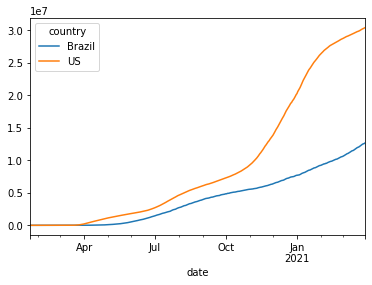

In [ ]:
dados_resumo_paises_filtrados.plot.line()

b) evolucao mortos

In [ ]:
selected_country = ['Brazil', 'US']

In [ ]:
dados_resumo_paises_filtrados = dados_resumo_paises[dados_resumo_paises['country'].isin(selected_country)]

In [ ]:
dados_resumo_paises_filtrados = dados_resumo_paises_filtrados.pivot(index = 'date', columns='country', values='dead')

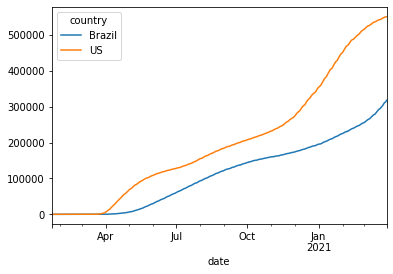

In [ ]:
dados_resumo_paises_filtrados.plot.line()

c) comparacao br x us infectados

In [ ]:
selected_country = ['Brazil', 'US']

In [ ]:
date_filter = '2021-03-20'

In [ ]:
dados_resumo_paises_filtrados = dados_resumo_paises[(dados_resumo_paises['date'] == date_filter) & \
                                                    (dados_resumo_paises['country'].isin(selected_country))]

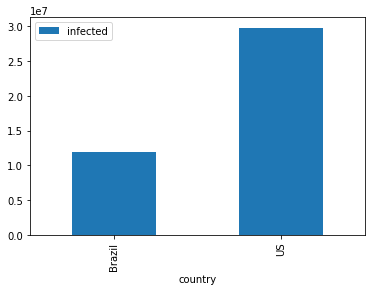

In [ ]:
dados_resumo_paises_filtrados.plot.bar(x = 'country', y = 'infected')

d) comparacao br x us mortos

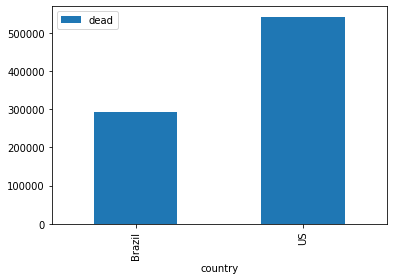

In [ ]:
dados_resumo_paises_filtrados.plot.bar(x = 'country', y = 'dead')

e) comparacao taxa

In [ ]:
dados_resumo_paises_filtrados['taxa_mortalidade'] = dados_resumo_paises_filtrados['dead'] / dados_resumo_paises_filtrados['infected']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dados_resumo_paises_filtrados

,date,country,infected,dead,taxa_mortalidade
81239,2021-03-20,Brazil,11950459,292752,0.024497
81394,2021-03-20,US,29786651,542178,0.018202


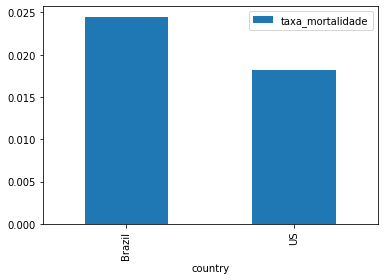

In [ ]:
dados_resumo_paises_filtrados.plot.bar(x = 'country', y = 'taxa_mortalidade')